In [1]:
import pandas as pd
import numpy as np

### Start by reading the csv file using Pandas
Let's read the `crocs_reviews.csv` file which contains the scrapped data into a dataframe.  

In [2]:
df = pd.read_csv("crocs_reviews.csv")

In [3]:
df

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
0,\nNot the good made in USA ones of years ago\n,Outdoor Enthusiast!,1.0 out of 5 stars,"\n\n I have worn Crocs for years, but the wel...",Size: 9 Women/7 MenColor: Grass Green,367 people found this helpful,"Reviewed in the United States on July 18, 2018"
1,\nTwo completely different sized shoes marked ...,MoMo Wondertoes,1.0 out of 5 stars,\n\n We have been buying crocs for a long tim...,Size: 7 Women/5 MenColor: Black,327 people found this helpful,"Reviewed in the United States on August 6, 2017"
2,\nLove Crocs but....\n,PJM,1.0 out of 5 stars,\n\n I was hoping these would fit like the Cl...,Size: 9 Women/7 MenColor: Navy,157 people found this helpful,"Reviewed in the United States on June 25, 2018"
3,\nNot buying Crocs.\n,Shemit,1.0 out of 5 stars,\n\n I would never recommend the now-a-day Cr...,Size: 7 Women/5 MenColor: Black,154 people found this helpful,"Reviewed in the United States on May 27, 2017"
4,\nDidn't last a month\n,Amazon Customer,1.0 out of 5 stars,\n\n I bought these to replace an earlier pai...,Size: 11 Women/9 MenColor: Navy,71 people found this helpful,"Reviewed in the United States on November 2, 2018"
...,...,...,...,...,...,...,...
8691,\nJust buy crocs\n,Tim H.,5.0 out of 5 stars,"\n\n Crocs are great, simple and comfortable ...",Size: 6 Women/4 MenColor: Black,NaN,"Reviewed in the United States on July 3, 2019"
8692,\nreview\n,Avainyuna,5.0 out of 5 stars,\n\n\n Your browser does not support HTML5 vi...,Size: 8 Women/6 MenColor: White,NaN,"Reviewed in the United States on October 23, 2020"
8693,\nVery nice\n,Patricia L. Meyer,5.0 out of 5 stars,"\n\n Bought for granddaughter, she loves them...",Size: 9 Women/7 MenColor: New Mint,NaN,"Reviewed in the United States on May 22, 2019"
8694,\nGreat buy.\n,K. lee,5.0 out of 5 stars,\n\n Fits and feels very comfortable. Perfect...,Size: 11 Women/9 MenColor: Navy,NaN,"Reviewed in the United States on January 15, 2019"


Pandas make it very easy to read the data from a data frame. From here we can see that the data frame contains 7 columns and 8696 rows. Each column needs to go through multiple steps for cleaning the data to bring it in a better format to carry the analysis part.

Let's view some basic information about the data frame using the `.info` method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8696 entries, 0 to 8695
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7156 non-null   object
 1   Author Name   8696 non-null   object
 2   Rating        8696 non-null   object
 3   Review        8696 non-null   object
 4   Size          8480 non-null   object
 5   Helpfullness  1222 non-null   object
 6   Review_Date   8696 non-null   object
dtypes: object(7)
memory usage: 475.7+ KB


Here, we can see that their are many `null` values in multiple columns. So it is important to remove those null values with the suitable values. Also, the datatype for each column is `object` which needs to be corrected according to the data contained in that column.

In [5]:
df.isnull().any()

Title            True
Author Name     False
Rating          False
Review          False
Size             True
Helpfullness     True
Review_Date     False
dtype: bool

### We will start the cleaning process column-wise.
We start by cleaning the first column that is Title. Here, by looking at the dataset we can see that there are multiple '\n' at the beginning and the end of every value. So we remove those values to get clear string values. 

Secondly, we know from the `.info` method that there are null values in this column, which we will replace by 'No title' string.

In [6]:
df['Title'] = df['Title'].replace('\n', '',regex=True)
df['Title'] = df['Title'].fillna('No Title') # We replace the nan values with 'No title' string.
df.head()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
0,Not the good made in USA ones of years ago,Outdoor Enthusiast!,1.0 out of 5 stars,"\n\n I have worn Crocs for years, but the wel...",Size: 9 Women/7 MenColor: Grass Green,367 people found this helpful,"Reviewed in the United States on July 18, 2018"
1,Two completely different sized shoes marked th...,MoMo Wondertoes,1.0 out of 5 stars,\n\n We have been buying crocs for a long tim...,Size: 7 Women/5 MenColor: Black,327 people found this helpful,"Reviewed in the United States on August 6, 2017"
2,Love Crocs but....,PJM,1.0 out of 5 stars,\n\n I was hoping these would fit like the Cl...,Size: 9 Women/7 MenColor: Navy,157 people found this helpful,"Reviewed in the United States on June 25, 2018"
3,Not buying Crocs.,Shemit,1.0 out of 5 stars,\n\n I would never recommend the now-a-day Cr...,Size: 7 Women/5 MenColor: Black,154 people found this helpful,"Reviewed in the United States on May 27, 2017"
4,Didn't last a month,Amazon Customer,1.0 out of 5 stars,\n\n I bought these to replace an earlier pai...,Size: 11 Women/9 MenColor: Navy,71 people found this helpful,"Reviewed in the United States on November 2, 2018"


Next we clean the `Rating` column by removing the unwanted strings and just keeping the rating count. In this column we don't have to worry about the null values as there are no null values.

In [7]:
df['Rating'] = df['Rating'].str.extract('(\d+.\d+|\d+)')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce', downcast='integer')

On the `Review` column, We perform similar steps which we performed on the `Title` column as there are multiple '\n' values in this column as well.

In [8]:
df['Review'] = df['Review'].replace('\n', '',regex=True)

Next we go to the `Size` column which contains three different values which can be divided into multiple columns. So we follow the below steps:
1. We separate out the color of the crocs and form a new column called Colour.
2. After removing the Color from the `Size` column we can see that it contains two values which can be divided into two columns, that is, `Men Size` and `Women Size`.
3. To make the calculations simpler, we extract only the numerical values from the Men Size and Women Size columns. 
4. After ectraction, we convert the object datatype to numeric.

In [9]:
df[['Size','Colour']] = df['Size'].str.split("Color:",expand=True)

In [10]:
df[['Men Size','Women Size']] = df['Size'].str.split("/",expand=True)
del df['Size']

In [11]:
df['Men Size'] = df['Men Size'].str.extract('(\d+.\d+|\d+)')
df['Women Size'] = df['Women Size'].str.extract('(\d+.\d+|\d+)')
df['Men Size'] = pd.to_numeric(df['Men Size'], errors='coerce')
df['Women Size'] = pd.to_numeric(df['Women Size'], errors='coerce')
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,Not the good made in USA ones of years ago,Outdoor Enthusiast!,1,"I have worn Crocs for years, but the well-ma...",367 people found this helpful,"Reviewed in the United States on July 18, 2018",Grass Green,9.0,7.0
1,Two completely different sized shoes marked th...,MoMo Wondertoes,1,We have been buying crocs for a long time an...,327 people found this helpful,"Reviewed in the United States on August 6, 2017",Black,7.0,5.0
2,Love Crocs but....,PJM,1,I was hoping these would fit like the Classi...,157 people found this helpful,"Reviewed in the United States on June 25, 2018",Navy,9.0,7.0
3,Not buying Crocs.,Shemit,1,I would never recommend the now-a-day Crocs ...,154 people found this helpful,"Reviewed in the United States on May 27, 2017",Black,7.0,5.0
4,Didn't last a month,Amazon Customer,1,I bought these to replace an earlier pair wh...,71 people found this helpful,"Reviewed in the United States on November 2, 2018",Navy,11.0,9.0


In [12]:
df.isnull().sum()

Title              0
Author Name        0
Rating             0
Review             0
Helpfullness    7474
Review_Date        0
Colour           216
Men Size         216
Women Size       284
dtype: int64

As we can notice that `Men Size` , `Women Size` and `Colour` columns have nan values. So to we can replace those nan values by the mode values of the respective columns.

In [13]:
df['Men Size'].fillna(df['Men Size'].mode()[0], inplace=True)
df['Women Size'].fillna(df['Women Size'].mode()[0], inplace=True)
df['Colour'].fillna(df['Colour'].mode()[0], inplace=True)

Let's clean the `Helpfullness` column now. We have a mix of strings, nan values and we need only the numerical values. So let's follow the below steps:
<ol>
<li> Remove the unwanted string and just keep the numerical value, which is the number at index 0.
<li> Remove the comma separator from the numbers having more than 3 digits.
<li> Replace the string one by the numerical 1.
<li> Replace the nan values with '0'.
<li> Convert the datatype from object to integer.
</ol>

In [14]:
df['Helpfullness'] = df['Helpfullness'].str.split().str.get(0)
df['Helpfullness'] = df['Helpfullness'].str.replace(',','')
df['Helpfullness'] = df['Helpfullness'].str.replace('One','1')
df['Helpfullness'] = df['Helpfullness'].fillna(0) # We replace the nan values with '0'.
df['Helpfullness'] = df['Helpfullness'].astype('int32')
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,Not the good made in USA ones of years ago,Outdoor Enthusiast!,1,"I have worn Crocs for years, but the well-ma...",367,"Reviewed in the United States on July 18, 2018",Grass Green,9.0,7.0
1,Two completely different sized shoes marked th...,MoMo Wondertoes,1,We have been buying crocs for a long time an...,327,"Reviewed in the United States on August 6, 2017",Black,7.0,5.0
2,Love Crocs but....,PJM,1,I was hoping these would fit like the Classi...,157,"Reviewed in the United States on June 25, 2018",Navy,9.0,7.0
3,Not buying Crocs.,Shemit,1,I would never recommend the now-a-day Crocs ...,154,"Reviewed in the United States on May 27, 2017",Black,7.0,5.0
4,Didn't last a month,Amazon Customer,1,I bought these to replace an earlier pair wh...,71,"Reviewed in the United States on November 2, 2018",Navy,11.0,9.0


Finally, we work on the `Review_Date` column. In this we need to extract only the year but as we can see that it contains multiple strings. So we perform the following process:
<ol>
    <li> We remove the starting strings and keep only the date part.
    <li> By using the <b>datetime</b> library we convert the string to the datetime format.
    <li> Now it becomes easy to extract only the year part from the date.
</ol>

In [15]:
from datetime import datetime
df['Review_Date'] = df['Review_Date'].str.strip().str[-4:]
df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce').dt.year
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,Not the good made in USA ones of years ago,Outdoor Enthusiast!,1,"I have worn Crocs for years, but the well-ma...",367,2018,Grass Green,9.0,7.0
1,Two completely different sized shoes marked th...,MoMo Wondertoes,1,We have been buying crocs for a long time an...,327,2017,Black,7.0,5.0
2,Love Crocs but....,PJM,1,I was hoping these would fit like the Classi...,157,2018,Navy,9.0,7.0
3,Not buying Crocs.,Shemit,1,I would never recommend the now-a-day Crocs ...,154,2017,Black,7.0,5.0
4,Didn't last a month,Amazon Customer,1,I bought these to replace an earlier pair wh...,71,2018,Navy,11.0,9.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8696 entries, 0 to 8695
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         8696 non-null   object 
 1   Author Name   8696 non-null   object 
 2   Rating        8696 non-null   int8   
 3   Review        8696 non-null   object 
 4   Helpfullness  8696 non-null   int32  
 5   Review_Date   8696 non-null   int64  
 6   Colour        8696 non-null   object 
 7   Men Size      8696 non-null   float64
 8   Women Size    8696 non-null   float64
dtypes: float64(2), int32(1), int64(1), int8(1), object(4)
memory usage: 518.1+ KB


In [18]:
df.describe()

,Rating,Helpfullness,Review_Date,Men Size,Women Size
count,8696.000000,8696.000000,8696.000000,8696.000000,8696.000000
mean,3.670538,1.782544,2018.361431,10.072677,8.033579
std,1.549828,34.314102,2.156366,2.652287,2.645690
min,1.000000,0.000000,2007.000000,4.000000,2.000000
25%,2.000000,0.000000,2017.000000,8.000000,6.000000
50%,5.000000,0.000000,2019.000000,10.000000,7.500000
75%,5.000000,0.000000,2020.000000,12.000000,10.000000
max,5.000000,1920.000000,2020.000000,19.000000,17.000000


As the final step we rearrange the columns to the desired arrangement and rename them for better understanding.

In [22]:
df = df[['Author Name','Title','Review','Rating','Colour','Men Size','Women Size','Helpfullness','Review_Date']]
df = df.rename(columns={"Author Name": "author_name", "Title": "review_title", "Review": "review_text", 
                   "Rating": "product_rating", "Colour": "product_colour", "Men Size": "men_size", "Women Size": "women_size",
                   "Helpfullness": "review_helpfullness", 
                   "Review_Date": "review_date"}, errors="raise")

,author_name,review_title,review_text,product_rating,product_colour,Men Size,Women Size,review_helpfullness,review_date
0,Outdoor Enthusiast!,Not the good made in USA ones of years ago,"I have worn Crocs for years, but the well-ma...",1,Grass Green,9.0,7.0,367,2018
1,MoMo Wondertoes,Two completely different sized shoes marked th...,We have been buying crocs for a long time an...,1,Black,7.0,5.0,327,2017
2,PJM,Love Crocs but....,I was hoping these would fit like the Classi...,1,Navy,9.0,7.0,157,2018
3,Shemit,Not buying Crocs.,I would never recommend the now-a-day Crocs ...,1,Black,7.0,5.0,154,2017
4,Amazon Customer,Didn't last a month,I bought these to replace an earlier pair wh...,1,Navy,11.0,9.0,71,2018
...,...,...,...,...,...,...,...,...,...
8691,Tim H.,Just buy crocs,"Crocs are great, simple and comfortable always",5,Black,6.0,4.0,0,2019
8692,Avainyuna,review,Your browser does not support HTML5 video. ...,5,White,8.0,6.0,0,2020
8693,Patricia L. Meyer,Very nice,"Bought for granddaughter, she loves them",5,New Mint,9.0,7.0,0,2019
8694,K. lee,Great buy.,Fits and feels very comfortable. Perfect for...,5,Navy,11.0,9.0,0,2019


In [23]:
df.head()

,Author Name,Title,Review,Rating,Colour,Men Size,Women Size,Helpfullness,Review_Date
0,Outdoor Enthusiast!,Not the good made in USA ones of years ago,"I have worn Crocs for years, but the well-ma...",1,Grass Green,9.0,7.0,367,2018
1,MoMo Wondertoes,Two completely different sized shoes marked th...,We have been buying crocs for a long time an...,1,Black,7.0,5.0,327,2017
2,PJM,Love Crocs but....,I was hoping these would fit like the Classi...,1,Navy,9.0,7.0,157,2018
3,Shemit,Not buying Crocs.,I would never recommend the now-a-day Crocs ...,1,Black,7.0,5.0,154,2017
4,Amazon Customer,Didn't last a month,I bought these to replace an earlier pair wh...,1,Navy,11.0,9.0,71,2018


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

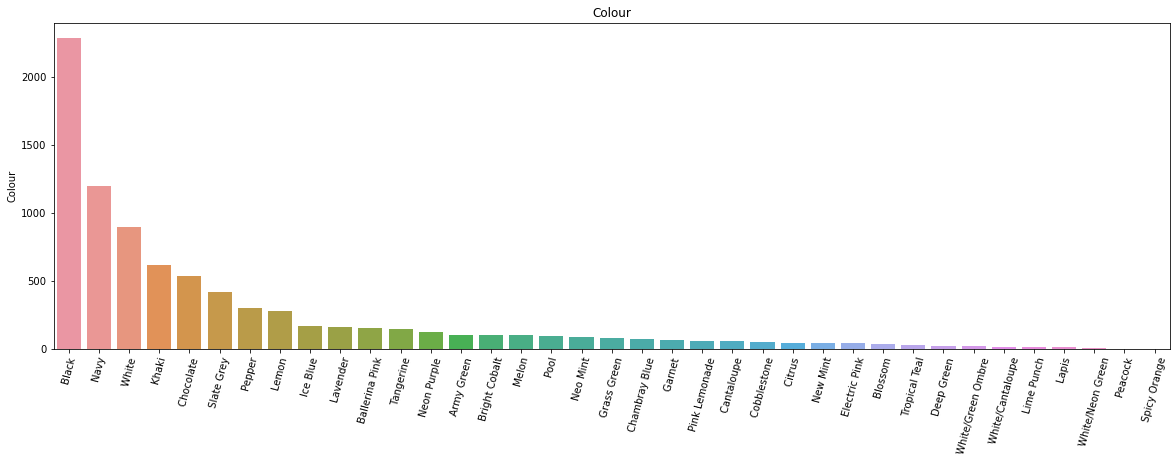

In [16]:
colour_counts = df['Colour'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(x=colour_counts.index, y=colour_counts)
plt.xticks(rotation=75)
plt.title('Colour')
plt.show()

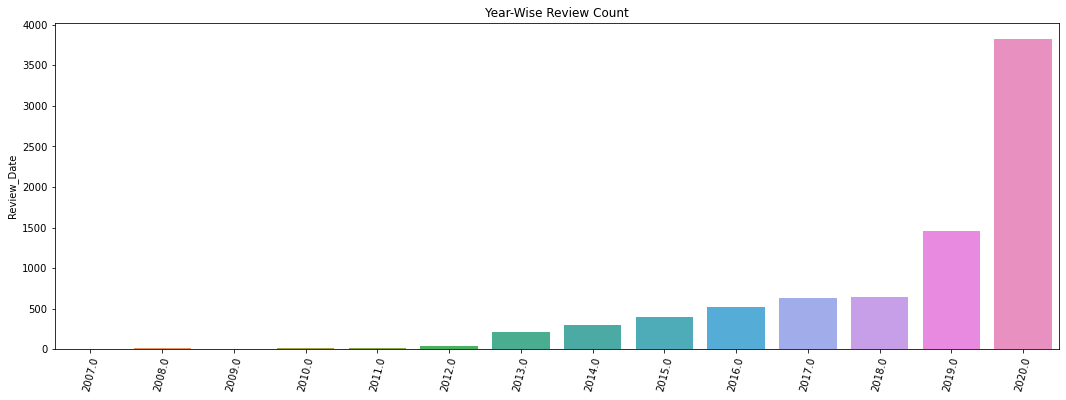

In [17]:
review_counts_date_wise = df['Review_Date'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=review_counts_date_wise.index, y=review_counts_date_wise)
plt.xticks(rotation=75)
plt.title('Year-Wise Review Count')
plt.show()

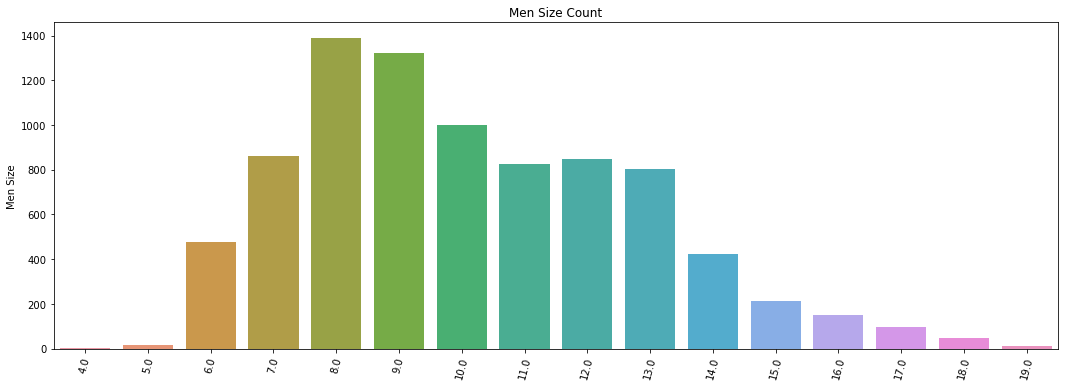

In [18]:
men_size_counts = df['Men Size'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=men_size_counts.index, y=men_size_counts)
plt.xticks(rotation=75)
plt.title('Men Size Count')
plt.show()

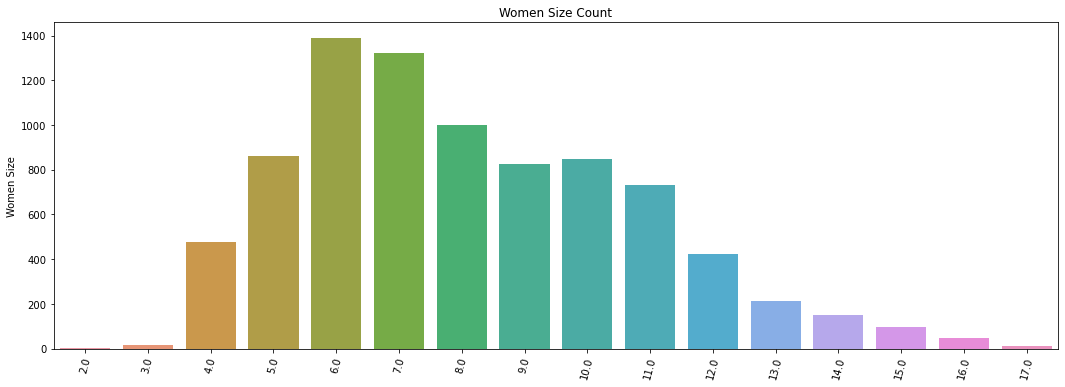

In [19]:
Women_size_counts = df['Women Size'].value_counts()

plt.figure(figsize=(18,6))
sns.barplot(x=Women_size_counts.index, y=Women_size_counts)
plt.xticks(rotation=75)
plt.title('Women Size Count')
plt.show()

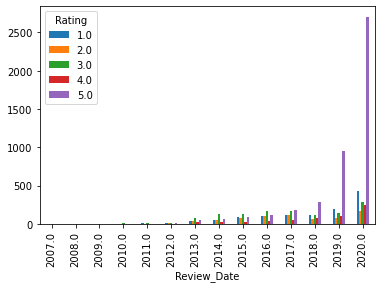

<Figure size 1296x432 with 0 Axes>

In [21]:
pd.crosstab(df['Review_Date'], df['Rating']).plot(kind="bar")
plt.figure(figsize=(18,6))
plt.show()

In [22]:
crocs_reviews_string = " ".join(df['Review'])


In [23]:
from nltk.corpus import stopwords

In [24]:
# Removing unwanted symbols incase if exists
crocs_reviews_string = re.sub("[^A-Za-z" "]+"," ",crocs_reviews_string).lower()
crocs_reviews_string = re.sub("[0-9" "]+"," ",crocs_reviews_string)


# words that contained in crocs reviews
crocs_reviews_words = crocs_reviews_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")


crocs_reviews_words = [w for w in crocs_reviews_words if not w in stop_words]
# Joinining all the reviews into single paragraph 
crocs_reviews_string = " ".join(crocs_reviews_words)



In [25]:
crocs_reviews_string

' worn crocs years well made ones came usa colorado many years ago made china ones harder plastic extremely wide feet slip around shoes fall also anywhere near comfortable due harder plastic even fit properly already started return process disappointed since many years american made ones finally starting wear need replacing buying crocs long time time received crocs marked right size one significantly smaller narrow something realized leaving vacation year old constantly complained one small large wear could find store buy flip flops return time got back worn sure happened definitely two different sizes hoping would fit like classic clog crocs already still feel small third pair ordered lately seem find fit hoping ended donating others value village since worn couple times none seemed roomy ones almost worn love crocs frustrated trying find right fit would never recommend day crocs clogs anyonecrocs unisex classic clog black us men us women worn pair crocs clogs years decided time repl

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

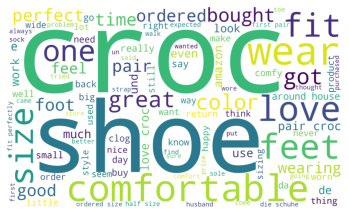

In [27]:
wordcloud_ip = WordCloud(
                      background_color='white',
                    width=2000,
                    height=1200,
                      max_words = 100
                     ).generate(crocs_reviews_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [29]:
crocs_review_title_string = " ".join(df['Title'])

TypeError: sequence item 2146: expected str instance, float found

In [23]:
# Removing unwanted symbols incase if exists
crocs_review_title_string = re.sub("[^A-Za-z" "]+"," ",crocs_review_title_string).lower()
crocs_review_title_string = re.sub("[0-9" "]+"," ",crocs_review_title_string)


# words that contained in crocs reviews
crocs_review_title_words = crocs_review_title_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")


crocs_review_title_words = [w for w in crocs_review_title_words if not w in stop_words]
# Joinining all the reviews into single paragraph 
crocs_review_title_string = " ".join(crocs_review_title_words)

NameError: name 'crocs_review_title_string' is not defined

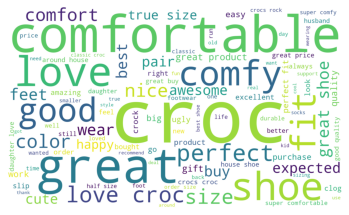

In [152]:
wordcloud_ip = WordCloud(
                      background_color='white',
                    width=2000,
                    height=1200,
                      max_words = 100
                     ).generate(crocs_review_title_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()